By Shrish Jaiswal, time taken: 7 hours.

Learnings:
1. Learnt to use KNN, Random Forest, and SVM classification algorithms, using Scikit-learn library in Python.
2. Explored more specific plots in Seaborn library like Violin-plot, Swarm-plot, etc. to better communicate the data story.
 
PS:
Having always worked in Health field, I was very much intrigued to take on this challenge of communicating a unique, well-thought 'data story'. So, despite going a bit overtime, I dived deeper to learn about new models and techniques, transfer my learnings from R, and explored more suitable plotting options.

In [311]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Reading and Cleaning

Upon skimming through the dataset manually, I saw that the missing values were replaced by '?'. So below, I assign them as the na values.

In [312]:
# Reading dataset
missing_values = ['?']
df = pd.read_csv('breast-cancer-wisconsin.csv', na_values = missing_values)
df

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2.0,1,1,1,2
694,841769,2,1,1,1,2,1.0,1,1,1,2
695,888820,5,10,10,3,7,3.0,8,10,2,4
696,897471,4,8,6,4,3,4.0,10,6,1,4


Adding column names for ease of reading.

In [313]:
df.columns=['sample_code_number','clump_thickness', 'uniform_cell_size', 
            'uniform_cell_shape', 'marginal_adhesion', 'single_epi_cell_size', 
            'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 
            'class']
df

,sample_code_number,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2.0,1,1,1,2
694,841769,2,1,1,1,2,1.0,1,1,1,2
695,888820,5,10,10,3,7,3.0,8,10,2,4
696,897471,4,8,6,4,3,4.0,10,6,1,4


In [314]:
# Dimensions of the dataset
df.shape

(698, 11)

In [316]:
# Checking how many na values the dataset has:
df.isna().sum()

sample_code_number       0
clump_thickness          0
uniform_cell_size        0
uniform_cell_shape       0
marginal_adhesion        0
single_epi_cell_size     0
bare_nuclei             16
bland_chromatin          0
normal_nucleoli          0
mitoses                  0
class                    0
dtype: int64

Since the total number of rows are 698 and 16 rows have na values, I decide to drop those rows.



In [326]:
df = df.dropna()

## Data Visualization

Now, I will visualize the data to get the overall understanding of the features.

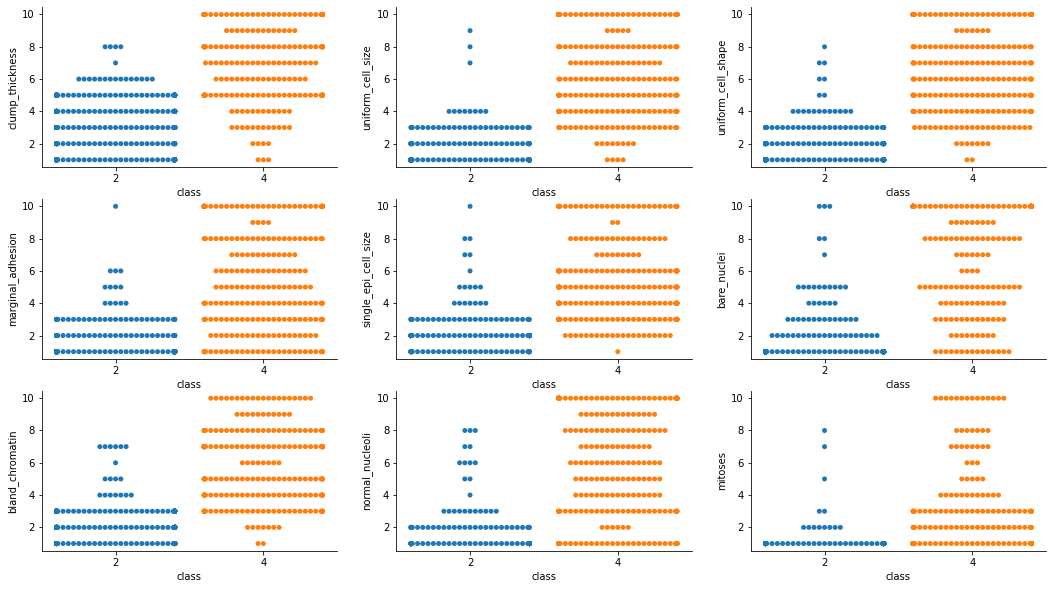

In [434]:
# To ignore warnings as not all data points could be plotted using the swarmplot 
#   in the given frame width.
import warnings
warnings.filterwarnings("ignore") 

# using swarmplot to capture approx data point intensity
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
sn.swarmplot(ax=axes[0,0], data=df, x='class', y='clump_thickness')
sn.swarmplot(ax=axes[0,1], data=df, x='class', y='uniform_cell_size')
sn.swarmplot(ax=axes[0,2], data=df, x='class', y='uniform_cell_shape')
sn.swarmplot(ax=axes[1,0], data=df, x='class', y='marginal_adhesion')
sn.swarmplot(ax=axes[1,1], data=df, x='class', y='single_epi_cell_size')
sn.swarmplot(ax=axes[1,2], data=df, x='class', y='bare_nuclei')
sn.swarmplot(ax=axes[2,0], data=df, x='class', y='bland_chromatin')
sn.swarmplot(ax=axes[2,1], data=df, x='class', y='normal_nucleoli')
sn.swarmplot(ax=axes[2,2], data=df, x='class', y='mitoses')
sn.despine()

My interpretation: Generally, higher values in each category means that the cell is malignant whereas lower values usually mean that the cell is benign.

Note: `sample_code_number` column wouldn't be of our use for classification and `class` column is our target class.

In [328]:
df_dependent = df.drop(['sample_code_number', 'class'], axis=1)

We are given that all our features are in the same scale of 1-10. So we wouldn't need to further scale our data.

## Feature Engineering

Now, let's explore different features for examining correlation and importance:



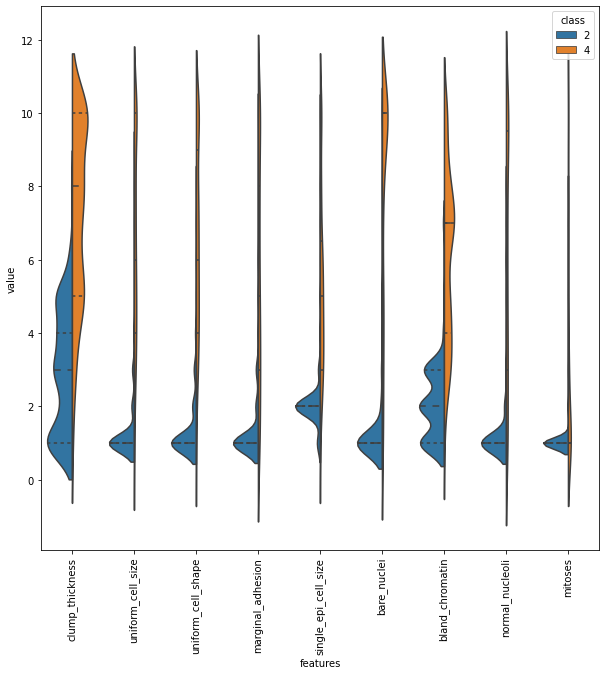

In [329]:
# Check distribution of numeric data
plt.figure(figsize=(10,10))
data = pd.concat([df['class'],df_dependent],axis=1)
data = pd.melt(data, id_vars="class", var_name="features", value_name='value')
sn.violinplot(x="features", y="value", hue="class", data=data,
              split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

From this, I can see that `uniform_cell_size`, `uniform_cell_shape`, `marginal_adhesion` and `normal_nucleoli` look the similar, let's further dive into it and see it in a detailed way:

Let's check the correlation between them:

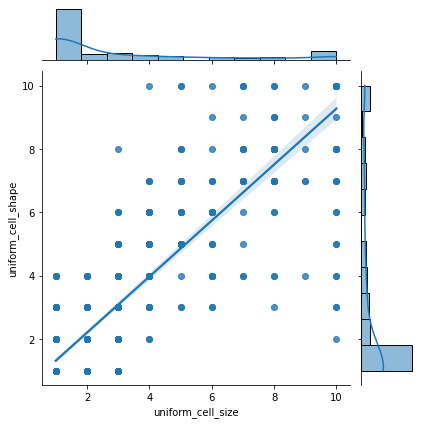

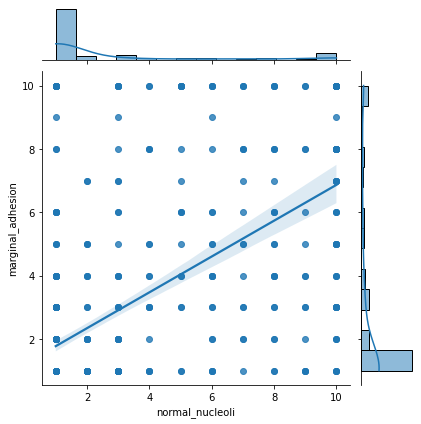

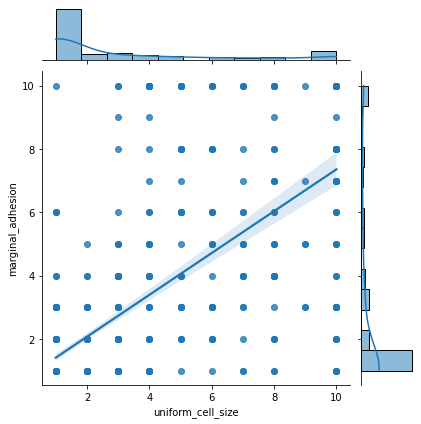

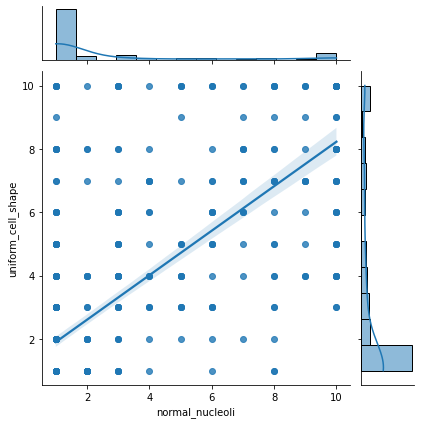

In [330]:
sn.jointplot(data=df, x='uniform_cell_size', y='uniform_cell_shape', kind='reg')
sn.jointplot(data=df, x='normal_nucleoli', y='marginal_adhesion', kind='reg')
sn.jointplot(data=df, x='uniform_cell_size', y='marginal_adhesion', kind='reg')
sn.jointplot(data=df, x='normal_nucleoli', y='uniform_cell_shape', kind='reg')
sn.despine()

`uniform_cell_shape` and `uniform_cell_size` look highly correlated, let's confirm this using a heatmap:

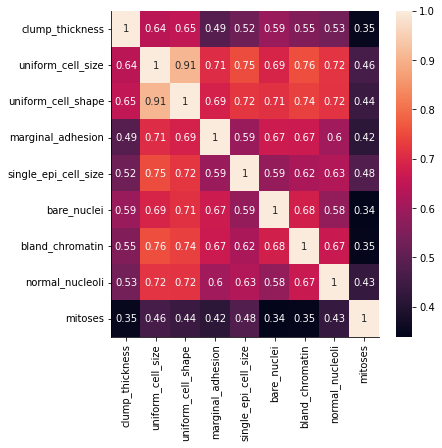

In [331]:
plt.figure(figsize=(6,6))
sn.heatmap(df_dependent.corr(), annot=True)
sn.despine()

We see that `uniform_cell_shape` and `uniform_cell_size` are highly correlated ( > 0.9), so I will only choose 1 among the 2. I choose to keep `uniform_cell_shape`.

In [332]:
df_dependent = df_dependent.drop(['uniform_cell_size'], axis=1)

## Creating Training and Testing dataset

We will use the inbuilt function `train_test_split` to split our data into training set and testing set. I will be training the model with 70% data points and validating against rest 30% testing data points.

In [399]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_dependent, df['class'], test_size=0.3)

## Choosing an ML model

So, we have 2 class, multi feature dataset and its a classification problem, so let's checkout some of the classification ML models:

#### K-Nearest Neighbours

In [400]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
knn_model.fit(x_train, y_train)
knn_model.score(x_test, y_test)

0.975609756097561

#### Support Vector Machines

In [431]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'rbf')
svm_model.fit(x_train, y_train)
svm_model.score(x_test, y_test)

0.9804878048780488

Since this is a classification problem, so I also explored Random Forest which employs multiple decision trees to categorize the data into target classes.

#### Random Forest Classification

In [402]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(x_train, y_train)
rfc_model.score(x_test, y_test)

0.9707317073170731

Since the given dataset seems to be well refined and the features mostly have a straightforward relationship with the target classes, the accuracies of each of the explored algorithms turned out to be pretty high.

Also since, we have a binary classification problem, the dataset has high-dimensions, and it is not a huge dataset(~700), I went with **Support Vector Machines(SVM) model** which also gave the highest accuracy among the three.

**A couple of things to note:**
1. SVM is more preferred for 2 class datasets (as it supports binary classification natively), whereas Random Forest is more preferred for datatsets with more than 2 classes.

2. SVM works well with small datasets and since the `class` column wasn't overlapping that much, so SVM was a good choice.

3. KNN is memory intensive and costly for training, making SVM less computationally demanding than KNN.

4. Usually where SVM applies, it performs better than Random Forest (also seen above).

Let's test the model on our testing dataset:


In [403]:
y_predicted = svm_model.predict(x_test)

Let's see the true positives, false positives, true negatives and false negatives using a confusion matrix to have a better idea of the model's performance:

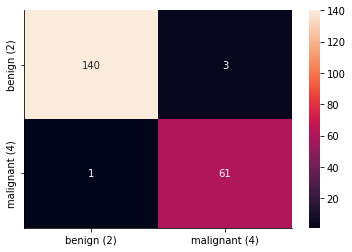

In [404]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
labels = ['benign (2)', 'malignant (4)']
sn.heatmap(cm, annot=True, xticklabels = labels, yticklabels = labels, fmt='g')
sn.despine()

As we can see that our model has identified 3 benign cells as malignant and 1 malignant cell as benign.

In [413]:
#Convert the predicted values into a Series for further visualization 
y_predicted = pd.Series(y_predicted)
# Also reset the index of y_test so that both have same index
y_test = y_test.reset_index(drop=True)


In [414]:
y_predicted

0      2
1      2
2      4
3      4
4      2
      ..
200    4
201    2
202    2
203    2
204    4
Length: 205, dtype: int64

In [415]:
y_test

0      2
1      2
2      4
3      4
4      2
      ..
200    4
201    2
202    2
203    2
204    4
Name: class, Length: 205, dtype: int64

Now, we will compare the 2 Series to find out what rows have been predicted wrongly:

In [419]:
compare_result = y_test.compare(y_predicted)
compare_result.columns = ['actual', 'predicted']
compare_result

,actual,predicted
8,2.0,4.0
12,2.0,4.0
95,2.0,4.0
104,4.0,2.0


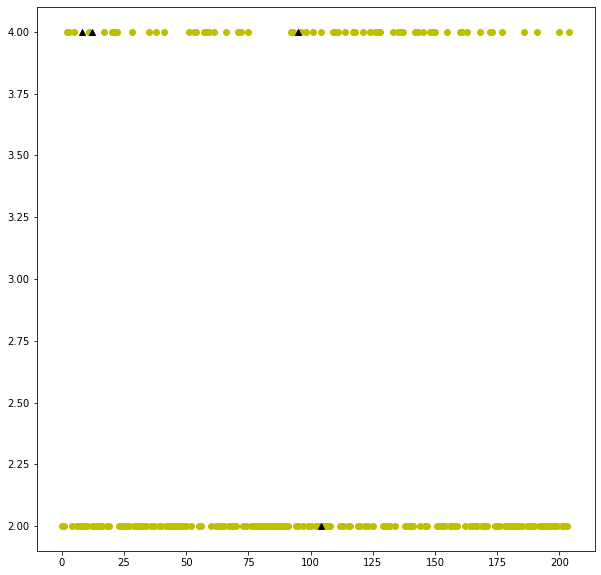

In [437]:
plt.figure(figsize=(10,10))
plt.plot(y_test, 'yo')
plt.plot(compare_result.drop(['actual'], axis=1),'k^')
plt.show()

From the testing dataset, the yellow dots represent the correct predictions by our SVM model, while the black triangles represent the incorrect predictions.